<a href="https://colab.research.google.com/github/santhoshBjeeffy/NLp_Practice/blob/master/MultiClassLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download("stopwords")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import iplot
import re
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS=set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
#import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
#cufflinks.go_offline()
#cufflinks.set_config_file(world_readable=True, theme='pearl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
url='/content/drive/My Drive/Colab Notebooks/machine_Learning/consumer.csv'
df=pd.read_csv(url)

In [4]:
df.head()

,Unnamed: 0,Product,Consumer_Complaint,category_id
0,1,Credit reporting,I have outdated information on my credit repor...,1
1,2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,2
2,7,Credit reporting,An account on my credit report has a mistaken ...,1
3,12,Debt collection,This company refuses to provide me verificatio...,4
4,16,Debt collection,This complaint is in regards to Square Two Fin...,4


In [0]:
df=df.drop(['category_id'],axis=1)

In [0]:
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.head()

,Product,Consumer_Complaint
0,Credit reporting,I have outdated information on my credit repor...
1,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
2,Credit reporting,An account on my credit report has a mistaken ...
3,Debt collection,This company refuses to provide me verificatio...
4,Debt collection,This complaint is in regards to Square Two Fin...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277814 entries, 0 to 277813
Data columns (total 2 columns):
Product               277814 non-null object
Consumer_Complaint    277814 non-null object
dtypes: object(2)
memory usage: 4.2+ MB


In [9]:
df.Product.value_counts()

Debt collection                                                                 63268
Credit reporting, credit repair services, or other personal consumer reports    49006
Mortgage                                                                        43837
Credit reporting                                                                31593
Credit card                                                                     18842
Student loan                                                                    16689
Bank account or service                                                         14887
Credit card or prepaid card                                                     10659
Consumer Loan                                                                    9474
Checking or savings account                                                      6489
Money transfer, virtual currency, or money service                               3089
Vehicle loan or lease                                 

In [0]:
df.loc[df['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df = df[df.Product != 'Other financial service']

In [0]:
def print_plot(index):
    example = df[df.index == index][['Consumer_Complaint', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])

In [12]:
print_plot(10)

Without provocation, I received notice that my credit line was being decreased by nearly 100 %. My available credit was reduced from $ XXXX to XXXX ( the rough amount of my available balance ). 

When I called to question the change, I was provided a nob-descript response referencing my XXXX report. It was my understanding that under the FCRA I was entitled to a copy of this report, but was refused by Citi and have been given no further explanation. 

This is predatory in that it affects my utilization of credit, further subjecting me to increase in APrs, etc and a higher cost of credit without any reason.
Product: Credit card or prepaid card


In [0]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Consumer_Complaint'] = df['Consumer_Complaint'].apply(clean_text)

In [0]:
df['Consumer_Complaint'] = df['Consumer_Complaint'].str.replace('\d+', '')


In [15]:
print_plot(100)

sent multiple letters agency account advised identitytheftgov completed sent fraud affidavit via certified mail see received nothing changed see supporting documents even usps tracking victim identity theft noticed collection ncc business services attempted dispute multiple times however response end sure else police department told contact federal trade commision wrote formal complaint ncc business services regards matter ftc also instructed complete id theft affidavit identity theftgov attached document thank
Product: Debt collection


In [16]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Consumer_Complaint'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 121550 unique tokens.


In [17]:
X = tokenizer.texts_to_sequences(df['Consumer_Complaint'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (277521, 250)


In [18]:
Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (277521, 13)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(249768, 250) (249768, 13)
(27753, 250) (27753, 13)


In [20]:

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1313      
Total params: 5,081,713
Trainable params: 5,081,713
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
epochs = 1
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 224791 samples, validate on 24977 samples
Epoch 1/1





224791/224791 [==============================] - 1977s 9ms/step - loss: 0.9522 - acc: 0.7102 - val_loss: 0.6913 - val_acc: 0.7867


In [22]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

27753/27753 [==============================] - 168s 6ms/step
Test set
  Loss: 0.695
  Accuracy: 0.787


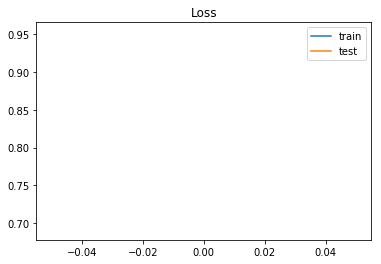

In [23]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

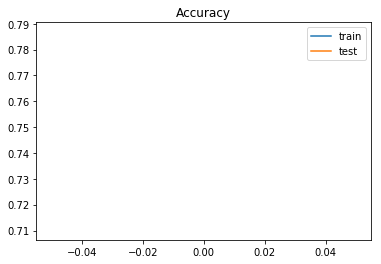

In [24]:

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [25]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[4.6379998e-02 1.1051132e-02 4.7920044e-03 8.7246835e-01 3.8168300e-02
  1.4719591e-02 6.6267280e-04 4.3013276e-04 2.3055624e-03 8.1681652e-04
  6.9930381e-03 3.8072030e-04 8.3157042e-04]] Credit card or prepaid card
